In [1]:
import pandas as pd 

In [2]:
import pandas as pd
df = pd.read_csv("inflation_features.csv")
df.head()


,REF_AREA,REF_AREA_LABEL,months_count,mean_inflation,volatility,max_inflation,min_inflation
0,AFG,Afghanistan,294,7.382666,11.972556,61.056952,-23.910326
1,ALA,Aland Islands,294,2.387619,3.716110,17.440000,-5.258964
2,ALB,Albania,294,4.173021,2.876274,14.692588,-3.215849
3,DZA,Algeria,294,5.021735,4.796756,16.891360,-6.012658
4,AND,Andorra,294,2.868838,2.815127,16.346154,-0.718563


In [3]:
features = df[[
    "mean_inflation",
    "volatility",
    "max_inflation",
    "min_inflation"
]]

features.head()


,mean_inflation,volatility,max_inflation,min_inflation
0,7.382666,11.972556,61.056952,-23.910326
1,2.387619,3.716110,17.440000,-5.258964
2,4.173021,2.876274,14.692588,-3.215849
3,5.021735,4.796756,16.891360,-6.012658
4,2.868838,2.815127,16.346154,-0.718563


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(features)


Matplotlib is building the font cache; this may take a moment.


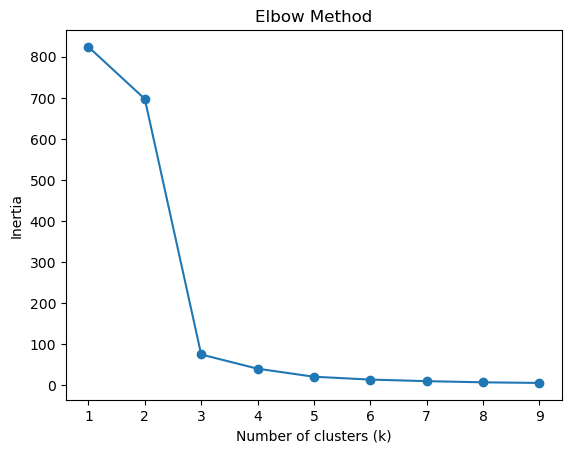

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [7]:
kmeans = KMeans(n_clusters=3, random_state=0)
df["cluster"] = kmeans.fit_predict(X)


In [11]:
df[["REF_AREA_LABEL", "cluster"]].sort_values("cluster")


,REF_AREA_LABEL,cluster
0,Afghanistan,0
15,Bahrain,0
31,Burkina Faso,0
21,Benin,0
45,"Congo, Rep.",0
...,...,...
200,"Yemen, Rep.",1
201,Zambia,1
203,World,1
205,South Asia,1


In [8]:
df.groupby("cluster")[["mean_inflation", "volatility", "max_inflation"]].mean()


,mean_inflation,volatility,max_inflation
cluster,,,
0,11.218263,19.671620,101.786152
1,6.920550,7.096259,34.693931
2,7967.204698,40665.522974,371537.503265


In [9]:
df.to_csv("inflation_features_clustered.csv", index=False)


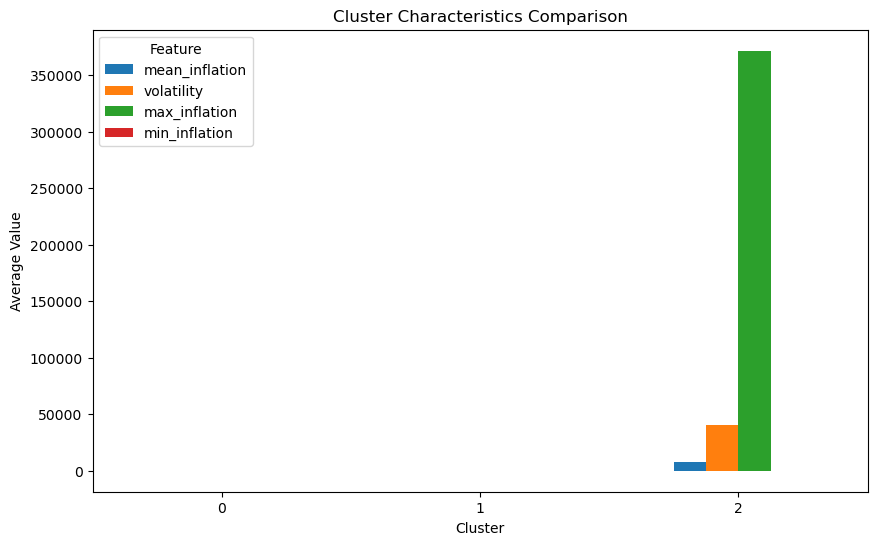

In [14]:
import matplotlib.pyplot as plt

# Calculate cluster averages
cluster_summary = df.groupby("cluster")[[
    "mean_inflation",
    "volatility",
    "max_inflation",
    "min_inflation"
]].mean()

# Plot
cluster_summary.plot(kind="bar", figsize=(10,6))
plt.title("Cluster Characteristics Comparison")
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(title="Feature")
plt.show()


In [41]:
cluster_names = {
    0: "Stable Inflation",
    1: "Volatile Inflation",
    2: "Extreme Inflation"
}

df["cluster_name"] = df["cluster"].map(cluster_names)

df.head()



,REF_AREA,REF_AREA_LABEL,months_count,mean_inflation,volatility,max_inflation,min_inflation,cluster,cluster_name
0,AFG,Afghanistan,294,7.382666,11.972556,61.056952,-23.910326,0,Stable Inflation
1,ALA,Aland Islands,294,2.387619,3.716110,17.440000,-5.258964,1,Volatile Inflation
2,ALB,Albania,294,4.173021,2.876274,14.692588,-3.215849,1,Volatile Inflation
3,DZA,Algeria,294,5.021735,4.796756,16.891360,-6.012658,1,Volatile Inflation
4,AND,Andorra,294,2.868838,2.815127,16.346154,-0.718563,1,Volatile Inflation


In [42]:
import pandas as pd
pd.set_option('display.max_rows', None)


In [43]:
df


,REF_AREA,REF_AREA_LABEL,months_count,mean_inflation,volatility,max_inflation,min_inflation,cluster,cluster_name
0,AFG,Afghanistan,294,7.382666,11.972556,61.056952,-23.910326,0,Stable Inflation
1,ALA,Aland Islands,294,2.387619,3.716110,17.440000,-5.258964,1,Volatile Inflation
2,ALB,Albania,294,4.173021,2.876274,14.692588,-3.215849,1,Volatile Inflation
3,DZA,Algeria,294,5.021735,4.796756,16.891360,-6.012658,1,Volatile Inflation
4,AND,Andorra,294,2.868838,2.815127,16.346154,-0.718563,1,Volatile Inflation
5,AGO,Angola,294,31.832276,32.129920,166.115402,5.807278,1,Volatile Inflation
6,AIA,Anguilla,291,3.509577,4.179675,17.534469,-4.729730,1,Volatile Inflation
7,ATG,Antigua and Barbuda,291,3.326459,3.057312,14.367433,-3.949941,1,Volatile Inflation
8,ARG,Argentina,294,35.469870,54.864810,308.269787,-4.232375,1,Volatile Inflation
9,ARM,Armenia,294,4.303552,5.073059,17.267516,-7.378679,1,Volatile Inflation


In [45]:

df.to_csv("clusters_output.csv", index=False)


In [46]:
  df[["REF_AREA_LABEL", "cluster"]].sort_values("cluster").to_csv("clusters.csv", index=False)
